In [1]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [2]:
import os

os.listdir("gdrive/MyDrive")

['Physics.pdf',
 '0081_Statement_Of_Entry.pdf',
 '0620_s10_qp_62.pdf',
 'Contact Information.gform',
 'Untitled spreadsheet.gsheet',
 'Untitled document (9).gdoc',
 'Google_Stock_Price_Train.gsheet',
 'Untitled document (8).gdoc',
 'Untitled document (7).gdoc',
 'KCL Accommodation Offer - Madhanrajan.pdf',
 'KCL Accommodation Offer - Madhanrajan.gdoc',
 'KCL CAS Letter - Madhanrajan VARADHARAJAN.pdf',
 '2018_19 Residence Agreement.pdf',
 'Student_Confirmation_of_Study_Letter_1852451.pdf',
 'Startup Video',
 'IMG_0376.JPG',
 'Formula-sheet.pdf',
 'FINAL Investigating the relationship between the period of simple  pendulum.docx',
 'FINAL Investigating the relationship between the period of simple  pendulum.gdoc',
 'Shian Housing Association website TEXT for HOME PAGE.docx',
 'Shian Housing Association website TEXT for HOME PAGE.gdoc',
 "Madhanrajan's Resume (1).pdf",
 'Gurantor Form.pdf',
 "Madhan's Resume.pdf",
 'Untitled form.gform',
 'Madhanrajan Varadharajan Reports Summary - 23andMe

In [3]:
from tensorflow import keras

model = keras.models.load_model("gdrive/MyDrive/mymodel21MarchPeakt.h5")

In [4]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 400)               721200    
                                                                 
 dense_25 (Dense)            (None, 400)               160400    
                                                                 
 dense_26 (Dense)            (None, 400)               160400    
                                                                 
 dense_27 (Dense)            (None, 400)               160400    
                                                                 
 dense_28 (Dense)            (None, 400)               160400    
                                                                 
 dense_29 (Dense)            (None, 400)               160400    
                                                                 
 dense_30 (Dense)            (None, 400)              

In [5]:
from google.colab import files

fl = files.upload()


Saving irf1000.npy to irf1000.npy


In [8]:
import numpy as np

fl2 = files.upload()

Saving NACL_90_1000.npy to NACL_90_1000.npy


In [23]:
irf = np.load("irf1000.npy")
irf = irf[np.argmax(irf):]
density = len(irf)
obs = np.load("NACL_90_1000.npy")[52:52+density] + 56



In [24]:
def f(x,a,tau):
    return a * np.exp(-x/tau)

In [25]:
x = np.array(range(density))

obs = np.convolve(f(x,0.1,3.3/4.9) + f(x,0.05,3/10) + f(x,0.2,30/85),irf)[:density]

cc = np.concatenate((obs,irf))

In [26]:
cc_norm = keras.utils.normalize(cc)

In [27]:
modela = keras.models.load_model("gdrive/MyDrive/mymodel21Marchpredicta.h5")

In [28]:
pred_n = model.predict(cc_norm)
pred_a = modela.predict(cc_norm)
print(pred_n)


[[0.16551939 0.56315225 0.1483046 ]]


In [ ]:
t1 = np.array(pred_n)[0][0]*4.9
t2 = np.array(pred_n)[0][1]*10
t3 = np.array(pred_n)[0][2]*85

a1 = np.array(pred_a)[0][0]
a2 = np.array(pred_a)[0][1]
a3 = np.array(pred_a)[0][2]

print([a1*4.9,a2*15,a3*85])

In [20]:



y = f(x,a1,t1) + f(x,a2,t2) + f(x,a3,t3)

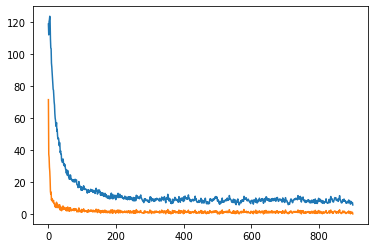

In [21]:
import matplotlib.pyplot as plt

plt.plot(x,np.convolve(y,irf)[:density])
plt.plot(x,obs)
plt.show()